In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('VENTAS2.csv')

<ipython-input-4-efd186fe3e8d>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('VENTAS2.csv')


In [5]:
df

,Bodega,Fecha,Nombre,Codigo,Articulo,Modelo,Marca,Clase,SubGrupo,Cantidad,...,Neto,Iva,Vta con Iva,CostoPromedio,CostoTotal,CANAL,Ciudad,Contibucion,TIPO,GRUPO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137625 entries, 5712 to 272932
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Bodega         137625 non-null  object 
 1   Nombre         137625 non-null  object 
 2   Codigo         137625 non-null  object 
 3   Modelo         133186 non-null  object 
 4   Marca          135029 non-null  object 
 5   Clase          135063 non-null  object 
 6   SubGrupo       134447 non-null  object 
 7   Cantidad       135285 non-null  float64
 8   Precio         137350 non-null  float64
 9   Descuento      137575 non-null  float64
 10  Neto           126224 non-null  float64
 11  Iva            136321 non-null  float64
 12  Vta con Iva    125534 non-null  float64
 13  CostoPromedio  137509 non-null  float64
 14  CostoTotal     128472 non-null  float64
 15  CANAL          94214 non-null   object 
 16  TIPO           137624 non-null  object 
 17  month          137625 non-null 

In [49]:
df.isnull().sum()

Codigo               0
Modelo            4439
Marca             2596
Clase             2562
SubGrupo          3178
Cantidad          2340
Precio             275
Descuento           50
Neto             11401
Iva               1304
Vta con Iva      12091
CostoPromedio      116
CostoTotal        9153
CANAL            43411
month                0
year                 0
dtype: int64

In [14]:
df.describe().transpose()

,count,unique,top,freq
Bodega,137625,28,Central,83885
Fecha,137625,872,30-Nov-2018,1793
Nombre,137625,4046,INSUMOS PROFESIONALES INSUPROF CIA. LTDA.,9946
Codigo,137625,6098,M28097,1446
Articulo,137625,6086,7861187900346 INDUCCION SET COCINA ATLANTIS 7P...,1446
Modelo,133186,3525,VULCANO,13903
Marca,135029,120,WARENHAUS,57605
Clase,135063,466,SARTEN,27846
SubGrupo,134447,40,COCINA,93114
Cantidad,137625,1084,1.00,40566


In [11]:
# Eliminar filas y columnas completamente vacías
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

In [37]:
df.nunique()

Bodega              28
Nombre            4046
Codigo            6098
Modelo            3525
Marca              120
Clase              466
SubGrupo            40
Cantidad           701
Precio            7327
Descuento         1665
Neto             19718
Iva              11403
Vta con Iva      21006
CostoPromedio     3155
CostoTotal       23348
CANAL               10
Ciudad              30
Contibucion      10645
TIPO                 1
month               12
year                 4
dtype: int64

In [17]:
df['Fecha'] =  pd.to_datetime(df['Fecha'])
df['month'] = df['Fecha'].apply(lambda date:date.month)
df['year'] = df['Fecha'].apply(lambda date:date.year)
df =  df.drop('Fecha', axis=1)

In [21]:
numeric_columns = ['Cantidad', 'Precio', 'Neto', 'Iva', 'Vta con Iva', 'CostoPromedio', 'CostoTotal']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [32]:
numeric_columns = ['Descuento']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

array([[<Axes: title={'center': 'Cantidad'}>,
        <Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Neto'}>],
       [<Axes: title={'center': 'Iva'}>,
        <Axes: title={'center': 'Vta con Iva'}>,
        <Axes: title={'center': 'CostoPromedio'}>],
       [<Axes: title={'center': 'CostoTotal'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

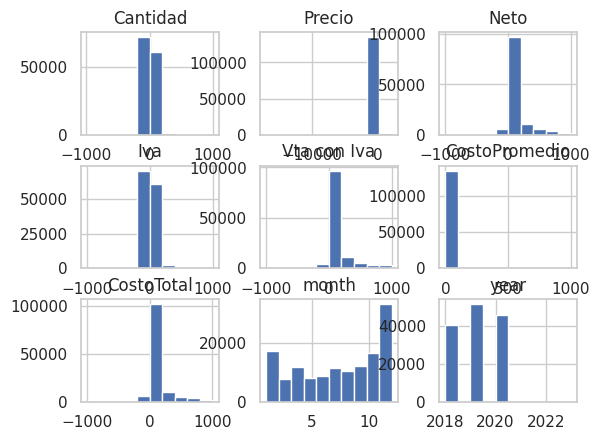

In [23]:
df.hist()

In [35]:
df['Bodega'].unique()

array(['Central', 'Compras en Consignacion', 'Consignacion Mega Kiwy',
       'Importaciones', 'Sala Showroom', 'Feria',
       'Consignacion Termalimex', 'Consignacion Marcimex',
       'Consignacion De Prati', 'Consignacion Jaher UIO',
       'Consignacion TVentas', 'Consignacion Icesa', 'Muestras',
       'Sala Showroom Gye', 'Mal Estado', 'Retail',
       'Productos Caja Mal Estado', 'Consignacion Multiclientes',
       'Consignacion PA-CO', 'Consignacion Vega', 'Consignacion Irvix',
       'Ventas Redes', 'Faltante Importaciones',
       'Consignacion Cooprogreso',
       'Consignacion Planta Warenhaus Clase B', 'Productos Exhibicion',
       'Consignacion Planta Warenhaus', 'Tienda Planta'], dtype=object)

In [31]:
df['Contibucion'].unique()

array([nan, '  5,970.64 ', '  63.83 ', ..., '  -13.74 ', '  14.66 ',
       '  -20.15 '], dtype=object)

In [36]:
df = df.drop('Articulo', axis=1)

In [45]:
df = df.drop('TIPO', axis=1)

In [46]:
df = df.drop('Bodega', axis=1)

In [48]:
df = df.drop('Nombre', axis=1)

In [54]:
df.isnull().sum()

Codigo               0
Modelo            4439
Marca             2596
Clase             2562
SubGrupo          3178
Cantidad          2340
Precio             275
Neto             11401
CostoPromedio      116
CostoTotal        9153
month                0
year                 0
dtype: int64

In [51]:
df = df.drop('Iva', axis=1)
df = df.drop('CANAL', axis=1)
df = df.drop('Descuento', axis=1)


In [66]:
df = df.drop('month', axis=1)


In [53]:
df = df.drop('Vta con Iva', axis=1)


In [56]:
df = df.dropna()

<Axes: >

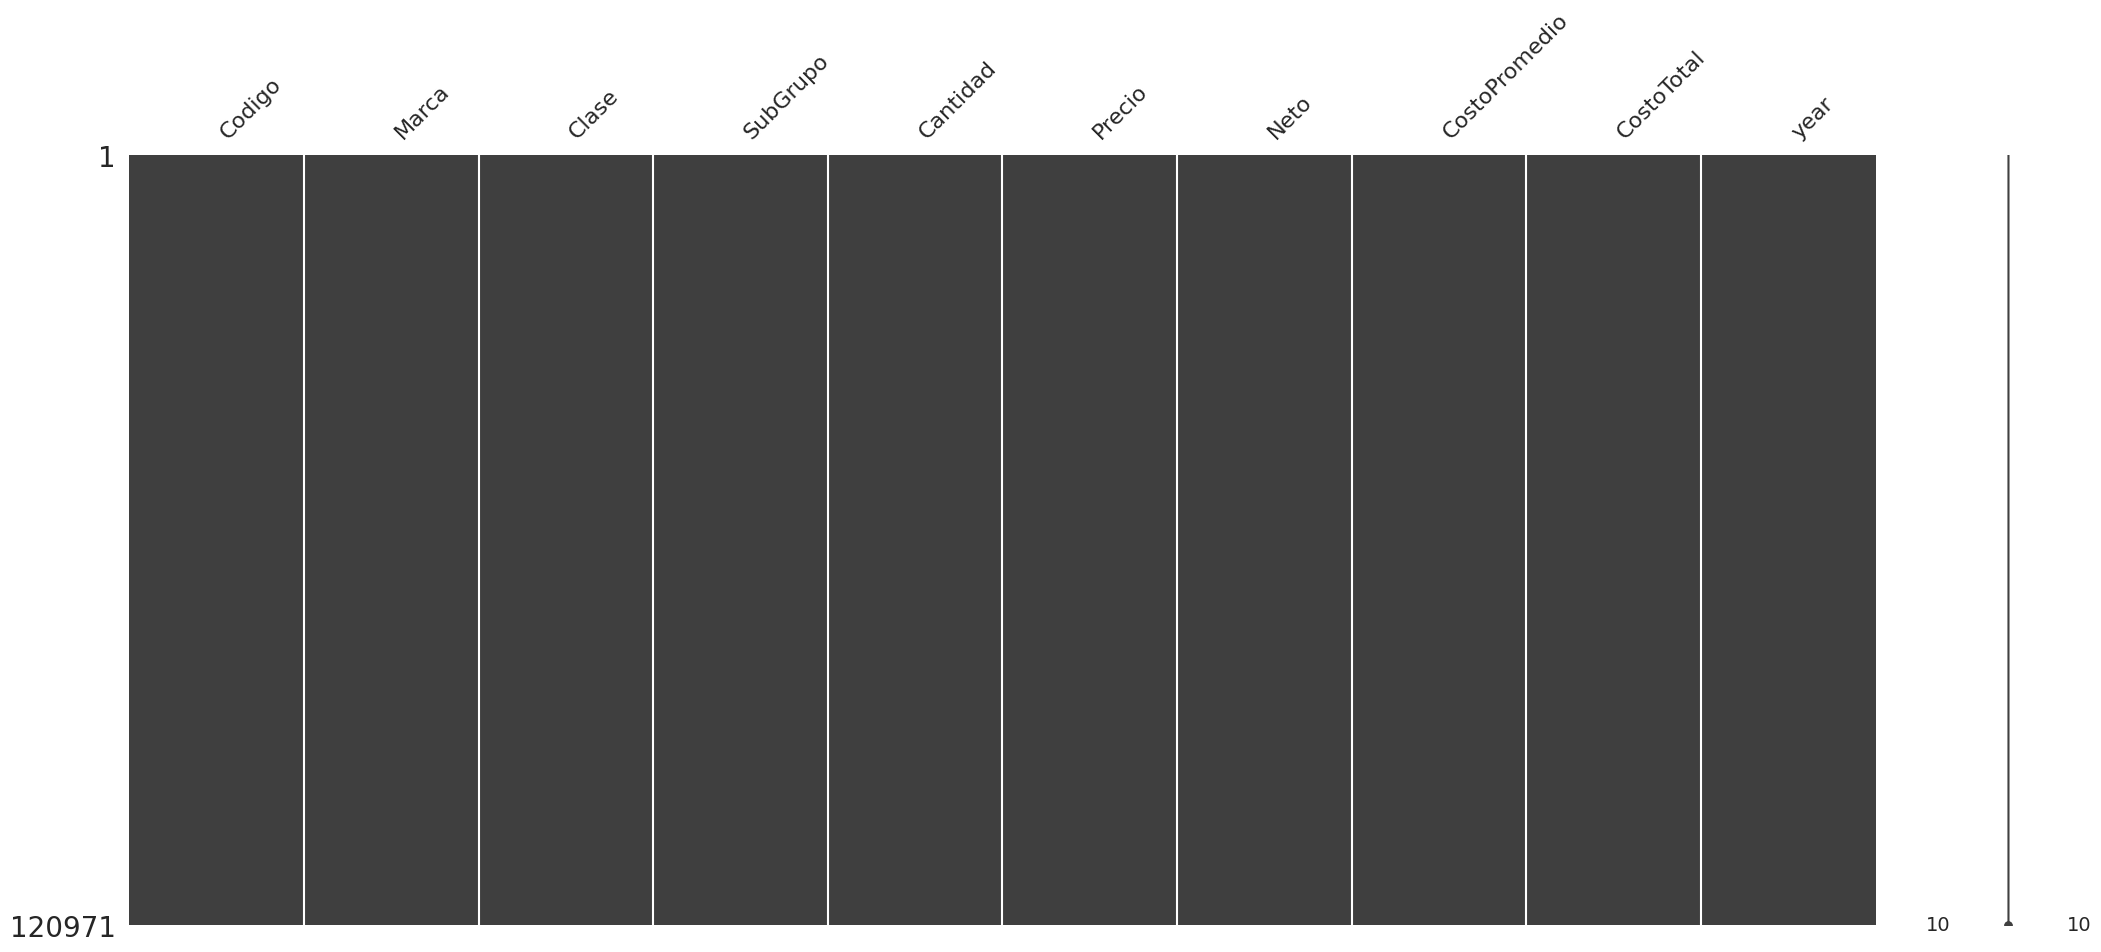

In [67]:
import missingno as msno

msno.matrix(df)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120971 entries, 5783 to 272932
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Codigo         120971 non-null  int64  
 1   Marca          120971 non-null  int64  
 2   Clase          120971 non-null  int64  
 3   SubGrupo       120971 non-null  int64  
 4   Cantidad       120971 non-null  float64
 5   Precio         120971 non-null  float64
 6   Neto           120971 non-null  float64
 7   CostoPromedio  120971 non-null  float64
 8   CostoTotal     120971 non-null  float64
 9   year           120971 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 10.2 MB


In [59]:
df

,Codigo,Modelo,Marca,Clase,SubGrupo,Cantidad,Precio,Neto,CostoPromedio,CostoTotal,month,year
5783,M71008,RC5225,BLACK+DECKER,OLLA ARROCERA,COCINA,-1.0,-46.67,-46.67,37.88,-37.88,1,2018
5784,M29022,GRAFITO,WARENHAUS,JUEGO DE SARTENES,COCINA,-1.0,-14.73,-14.73,11.33,-11.33,1,2018
5787,M70983,BD-J4500R/ZX,SAMSUNG,BLURAY,VIDEO,-2.0,-69.86,-139.72,63.54,-127.09,1,2018
5792,M70746,BLSTMG-RD0-013,OSTER,LICUADORA,COCINA,-5.0,-39.21,-196.05,27.65,-138.27,1,2018
5793,M70968,FPSTFP3322-013,OSTER,PICATODO,COCINA,-4.0,-16.91,-67.64,12.88,-51.50,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
168908,M70441,6544-013-000,OSTER,TOSTADOR,COCINA,1.0,31.88,28.69,19.98,19.98,12,2020
168909,M11401,347601,MAXELL,MOUSE,ACCESORIOS,1.0,7.88,3.94,7.51,7.51,12,2020
168910,M11087,347269,MAXELL,PARLANTE,AUDIO,2.0,22.26,22.26,21.20,42.41,12,2020
168911,M11860,ARG-MS-2040BK,ARGOM,MOUSE,ACCESORIOS,2.0,9.82,9.82,6.91,13.82,12,2020


In [60]:
numeric_columns = ['Cantidad', 'Precio', 'Neto', 'CostoTotal']

for column in numeric_columns:
  df[column] = abs(df[column])


In [63]:
df

,Codigo,Marca,Clase,SubGrupo,Cantidad,Precio,Neto,CostoPromedio,CostoTotal,month,year
5783,M71008,BLACK+DECKER,OLLA ARROCERA,COCINA,1.0,46.67,46.67,37.88,37.88,1,2018
5784,M29022,WARENHAUS,JUEGO DE SARTENES,COCINA,1.0,14.73,14.73,11.33,11.33,1,2018
5787,M70983,SAMSUNG,BLURAY,VIDEO,2.0,69.86,139.72,63.54,127.09,1,2018
5792,M70746,OSTER,LICUADORA,COCINA,5.0,39.21,196.05,27.65,138.27,1,2018
5793,M70968,OSTER,PICATODO,COCINA,4.0,16.91,67.64,12.88,51.50,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
168908,M70441,OSTER,TOSTADOR,COCINA,1.0,31.88,28.69,19.98,19.98,12,2020
168909,M11401,MAXELL,MOUSE,ACCESORIOS,1.0,7.88,3.94,7.51,7.51,12,2020
168910,M11087,MAXELL,PARLANTE,AUDIO,2.0,22.26,22.26,21.20,42.41,12,2020
168911,M11860,ARGOM,MOUSE,ACCESORIOS,2.0,9.82,9.82,6.91,13.82,12,2020


In [62]:
df = df.drop('Modelo', axis=1)

In [64]:
le = LabelEncoder()
df['Codigo'] = le.fit_transform(df['Codigo'])
df['Clase'] = le.fit_transform(df['Clase'])
df['Marca'] = le.fit_transform(df['Marca'])
df['SubGrupo' ] = le.fit_transform(df['SubGrupo' ])

In [65]:
df

,Codigo,Marca,Clase,SubGrupo,Cantidad,Precio,Neto,CostoPromedio,CostoTotal,month,year
5783,2224,6,229,8,1.0,46.67,46.67,37.88,37.88,1,2018
5784,1119,88,175,8,1.0,14.73,14.73,11.33,11.33,1,2018
5787,2210,67,42,37,2.0,69.86,139.72,63.54,127.09,1,2018
5792,2125,50,191,8,5.0,39.21,196.05,27.65,138.27,1,2018
5793,2195,50,244,8,4.0,16.91,67.64,12.88,51.50,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
168908,2086,50,355,8,1.0,31.88,28.69,19.98,19.98,12,2020
168909,184,40,219,0,1.0,7.88,3.94,7.51,7.51,12,2020
168910,89,40,237,3,2.0,22.26,22.26,21.20,42.41,12,2020
168911,486,3,219,0,2.0,9.82,9.82,6.91,13.82,12,2020


<Axes: title={'center': 'Seaborn'}>

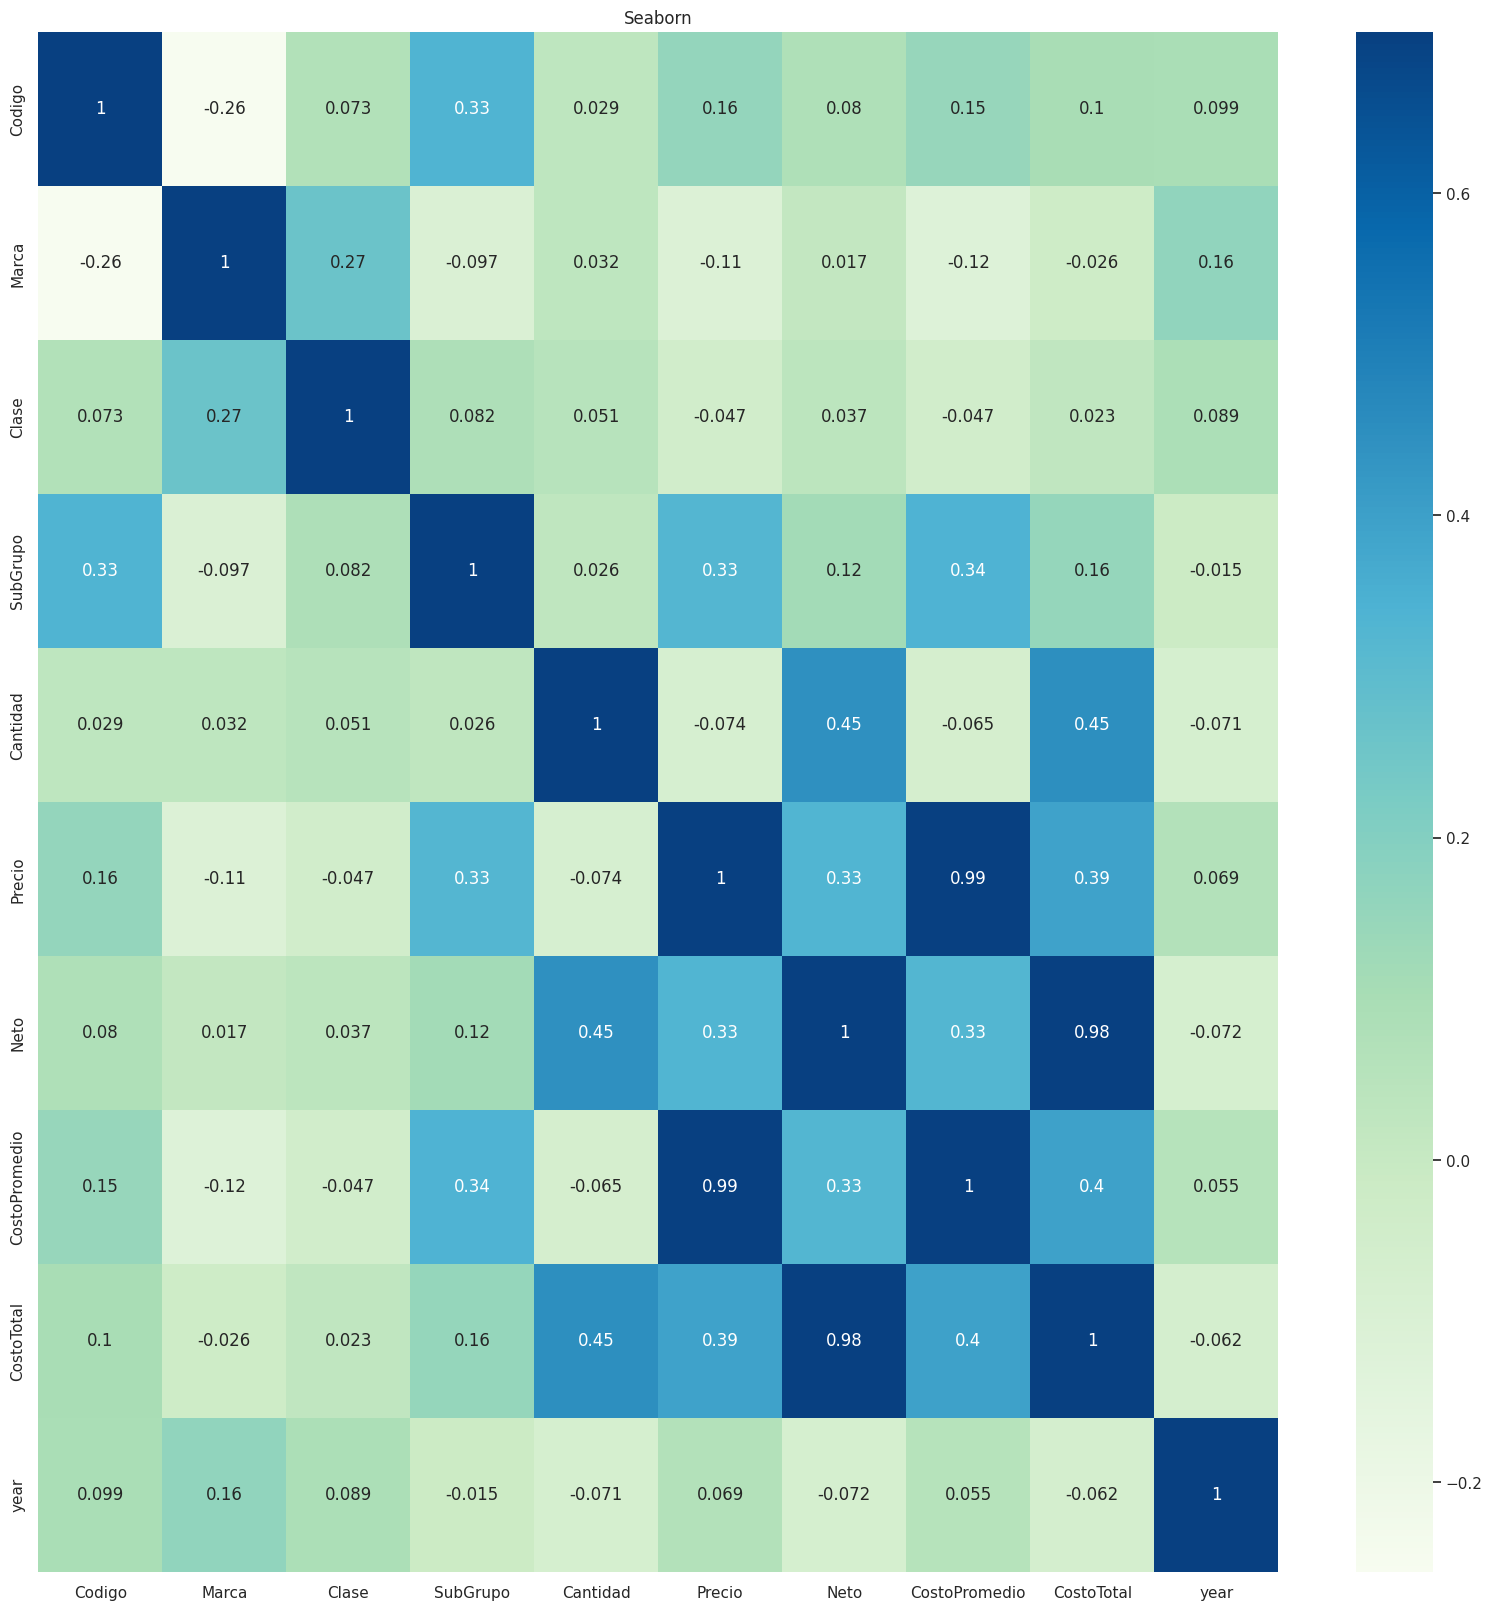

In [68]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(20,20))
plt.title("Seaborn")
sns.heatmap(df.corr(),vmax=0.7,annot=True,cmap="GnBu")

In [70]:
df.isnull().sum()

Codigo           0
Marca            0
Clase            0
SubGrupo         0
Cantidad         0
Precio           0
Neto             0
CostoPromedio    0
CostoTotal       0
year             0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120971 entries, 5783 to 272932
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Codigo         120971 non-null  int64  
 1   Marca          120971 non-null  int64  
 2   Clase          120971 non-null  int64  
 3   SubGrupo       120971 non-null  int64  
 4   Cantidad       120971 non-null  float64
 5   Precio         120971 non-null  float64
 6   Neto           120971 non-null  float64
 7   CostoPromedio  120971 non-null  float64
 8   CostoTotal     120971 non-null  float64
 9   year           120971 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 10.2 MB


In [95]:
X = df.drop('Neto',axis = 1)
y = df['Neto']

In [96]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


In [108]:
def modelo(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=800, test_size=0.3)
  red_neuronal = Sequential()
  red_neuronal.add(Dense(units = 9,activation='relu'))
  red_neuronal.add(Dense(units = 4,activation='relu'))
  red_neuronal.add(Dense(units = 1))
  red_neuronal.compile(optimizer='adam',
                       loss='mse',
                       metrics=['accuracy'])
  red_neuronal.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=100,batch_size=600
                  ,verbose=0)
  loss = pd.DataFrame(red_neuronal.history.history)
  plt.figure(figsize=(15,15))
  sns.lineplot(data=loss,lw=3)
  sns.despine()
  return red_neuronal, X_train, X_test, y_train, y_test

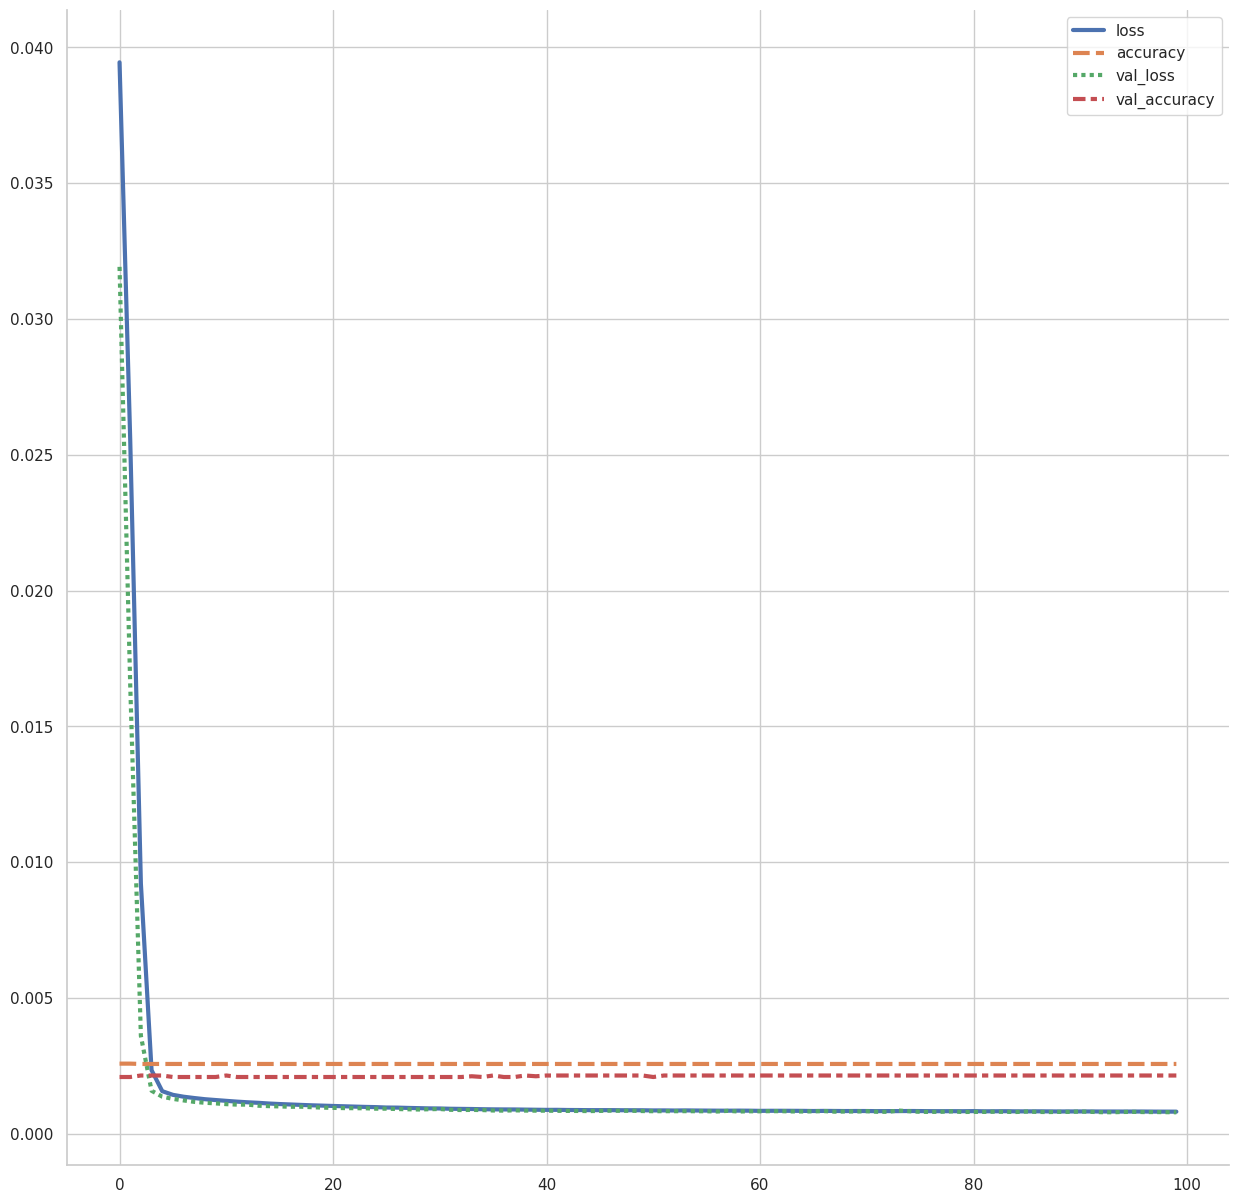

In [97]:
red_neuronal, X_train, X_test, y_train, y_test = modelo(X, y)

In [103]:
y_predic = red_neuronal.predict(X_test)
errorAbsoluto = mean_absolute_error(y_test,y_predic)
print(errorAbsoluto)

1135/1135 [==============================] - 2s 2ms/step
0.01233108196294994


In [99]:
red_neuronal.save('Regresion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
import pickle
scaler.fit(X)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [107]:
X_test[1]

array([0.39318551, 0.96907216, 0.40379404, 0.92105263, 0.00625   ,
       0.00180298, 0.00172632, 0.00987533, 0.        ])

In [112]:
input_data = [
    0,  #Codigo
  10,  # Cantidad
  100,  # Precio
  1000,  # CostoTotal
  0,  # Codigo
  1,  # Clase
  2,  # Marca
  3,  # SubGrupo
  2023  # year
]

# Scale the input data
input_data_scaled = scaler.transform([input_data])

# Predict the output
predicted_value = red_neuronal.predict(input_data_scaled)[0][0]

# Print the predicted value
print(f"Precio estimado: {predicted_value}")


1/1 [==============================] - 0s 21ms/step
Precio estimado: 4.291777610778809


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
